In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import gkey

In [62]:
rating_data="LargeSample.csv"
rating_py=pd.read_csv(rating_data)

In [63]:
rating_py[["City","State", "Country","House Number"]] = rating_py.Address.str.split(",",expand=True)
rating_py[["Random", "City"]] = rating_py.City.str.split(" ",expand=True, n = 1)
rating_new = rating_py.drop(columns=["Address", "Random", "House Number"], axis = 1)
rating_new.drop_duplicates(keep='first', inplace=True, ignore_index=True)
rating_new = rating_new[rating_new['State'].str.len() < 4].reset_index()
rating_new = rating_new[rating_new['Ratings count'] < 15000].reset_index()
rating_new

,level_0,index,Place ID,Name,Latitude,Longitude,Rating,Ratings count,Price range,City,State,Country
0,0,0,ChIJZQ6BEXZe14AR6olrRzitFFc,Subway,32.849288,-115.569706,4.2,72,1,Imperial,CA,USA
1,1,1,ChIJG3vjvDda14ARQQpdsyPpiZM,Subway,32.962409,-115.545849,3.9,24,1,Brawley,CA,USA
2,2,2,ChIJ65WooQpe14ARe5yAyhIps28,Maranatha Steakhouse,32.841779,-115.568291,4.5,310,2,Imperial,CA,USA
3,3,3,ChIJP646YhRa14ARqb8dCyn0i5s,Pizza Hut,32.978951,-115.547330,4.2,257,1,Brawley,CA,USA
4,4,4,ChIJH3Qkemla14ARaPGcgMIywEM,Little Caesars Pizza,32.978710,-115.537636,4.4,193,1,Brawley,CA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
18930,18937,19163,ChIJJXZCTaqo1oYRNmy84A-5lc0,Restaurant La Bocanita,31.475669,-111.000913,4.3,457,2,Rio Rico,AZ,USA
18931,18938,19164,ChIJIySXp6-t1oYRtZjbmxiHX80,Subway,31.364264,-110.941297,4.3,139,1,Nogales,AZ,USA
18932,18939,19165,ChIJr1R0p6-t1oYRcBIFc2WNaNM,Little Caesars Pizza,31.364300,-110.941260,3.8,218,1,Nogales,AZ,USA
18933,18940,19166,ChIJJY8bXC2s1oYR5Hz3sDrizpc,Gariola Coffee House,31.366275,-110.934318,4.7,99,2,Nogales,AZ,USA


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 <a list of 49 Text major ticklabel objects>)

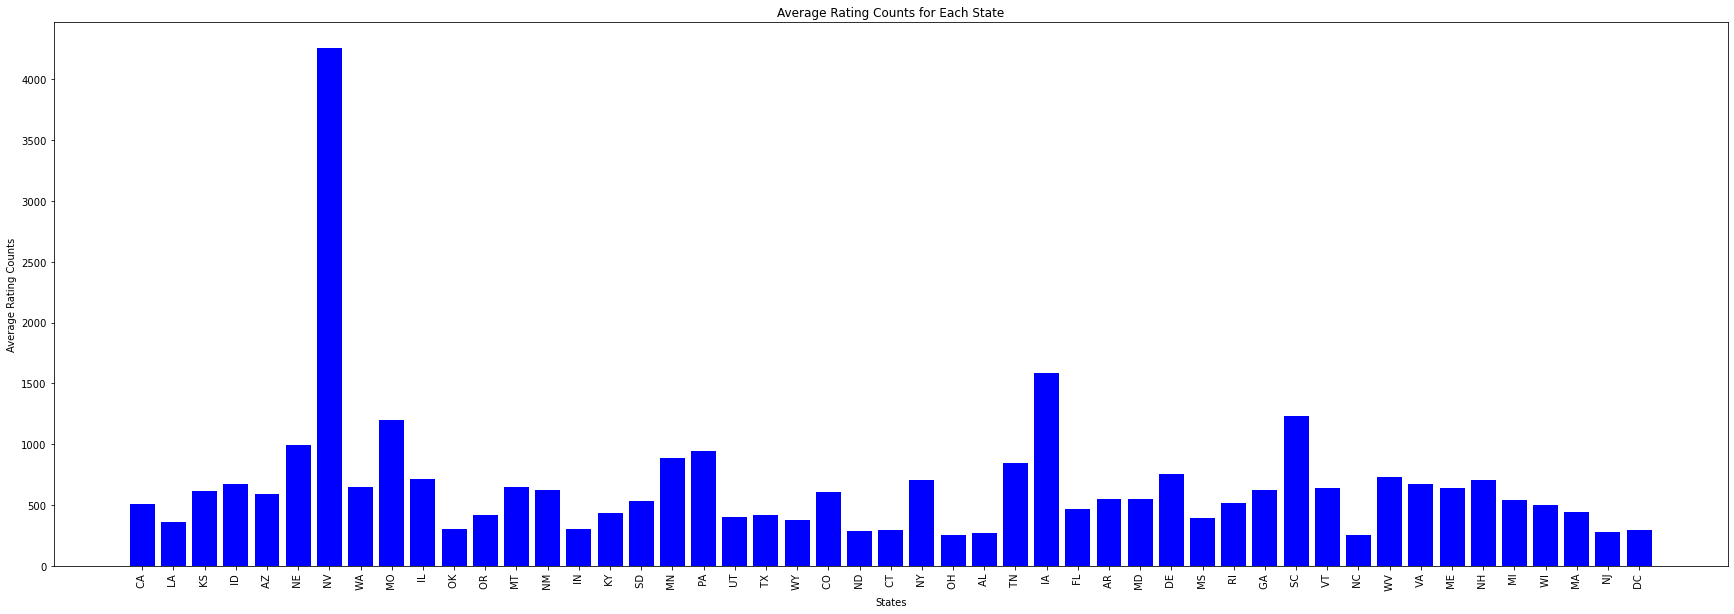

In [98]:
grouped_rating = rating_new.groupby("State")["Ratings count"]
state_name = rating_new["State"].unique()
rating_count_mean = grouped_rating.mean()
plt.figure(figsize=(30,10))
plt.bar(state_name, rating_count_mean, color='b', alpha=1, align="center")
plt.title("Average Rating Counts for Each State")
plt.ylabel("Average Rating Counts")
plt.xlabel("States")
plt.savefig("avg_state.png")
plt.xticks(rotation=90)

<function matplotlib.pyplot.show(*args, **kw)>

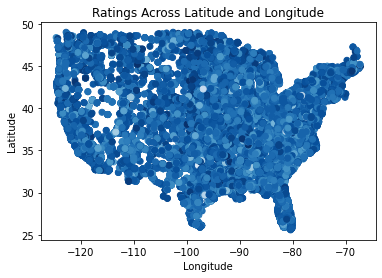

In [97]:
x_axis= rating_new["Longitude"]
y_axis = rating_new["Latitude"]
s = rating_new["Rating"]
plt.scatter(x_axis, y_axis, c=rating_new["Rating"], cmap = "Blues" )
plt.title("Ratings Across Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("Lat_Long.png")
plt.show

In [73]:
# grouped_name = rating_new.groupby(["Name"])
count = rating_new['Name'].value_counts()
count.head(10)

Subway                             5427
Little Caesars Pizza                568
McDonald's                          311
Pizza Hut                           263
Casey's                             224
Sonic Drive-In                      210
Shell                               193
Texas Roadhouse                     174
Olive Garden Italian Restaurant     145
Papa John's Pizza                   126
Name: Name, dtype: int64

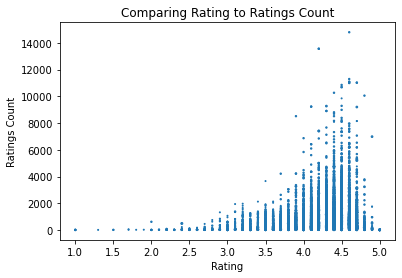

In [99]:
x_values = rating_new["Rating"]
y_values = rating_new["Ratings count"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, s=rating_new["Price range"])
plt.xlabel("Rating")
plt.ylabel("Ratings Count")
plt.title("Comparing Rating to Ratings Count")
plt.savefig("rating_count.png")
plt.show()

The r value is: 0.40230920501565354


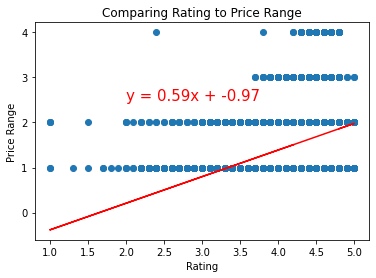

In [84]:
x_values = rating_new["Rating"]
y_values = rating_new["Price range"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r value is: {rvalue}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,2.5),fontsize=15,color="red")
plt.xlabel("Rating")
plt.ylabel("Price Range")
plt.title("Comparing Rating to Price Range")
plt.show()

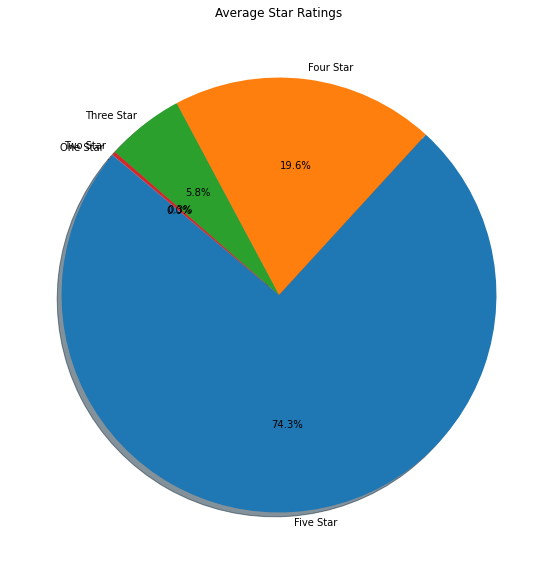

In [100]:
bins = [0, 1.4, 2.4, 3.4, 4.4, 5.0]

# Create the names for the five bins
group_names = ["One Star", "Two Star", "Three Star", "Four Star", "Five Star"]
rating_new["Star Rating"] = pd.cut(rating_new["Rating"], bins, labels=group_names, include_lowest=True)
rating_new
labels = ["Five Star", "Four Star", "Three Star", "Two Star", "One Star"]
star_rating = rating_new["Star Rating"].value_counts()
plt.figure(figsize=[10, 10])
plt.pie(star_rating, labels = labels,  autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.05)
plt.title("Average Star Ratings")
plt.savefig("star_rating.png")

In [87]:
rating_new.max()

level_0                                 18941
index                                   19167
Place ID          ChIJzzpKyfQdKIcRQ0s-5vl1rD4
Name             나루터 Naruto Korean Restaurant
Latitude                              48.9958
Longitude                            -67.1744
Rating                                      5
Ratings count                           14801
Price range                                 4
City                                     Zuni
State                                      WY
Country                                   USA
Star Rating                          Two Star
dtype: object

In [79]:
# There is another idea for _df that tells something:
# Group by name, rating count.sum()
# Sort by rating count sum...
# Find 10 most reviewed restaurants...
# Probably going to be a bigger chain with a lot of stores...

name_group = rating_new.groupby(["Name"])
rating_count_sum = name_group["Ratings count"].sum()
rating_sum_sorted = rating_count_sum.sort_values(ascending=False).head(10)
count_df = pd.DataFrame({"Sum Ratings Count": rating_sum_sorted})
count_df = count_df[["Sum Ratings Count"]]
count_df

# plt.bar(, count_df["Sum Ratings Count"], color='b', alpha=1, align="center")

,Sum Ratings Count
Name,
Subway,533509
Texas Roadhouse,479313
Olive Garden Italian Restaurant,307782
McDonald's,235943
Cracker Barrel Old Country Store,186839
Little Caesars Pizza,145274
Golden Corral Buffet & Grill,116946
Sonic Drive-In,96332
Buffalo Wild Wings,93133
